In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sbn
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import imblearn
from sklearn.decomposition  import PCA
from sklearn import preprocessing
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv(".\crimes.csv",sep=";")

In [3]:
data.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [4]:
data.shape

(50, 8)

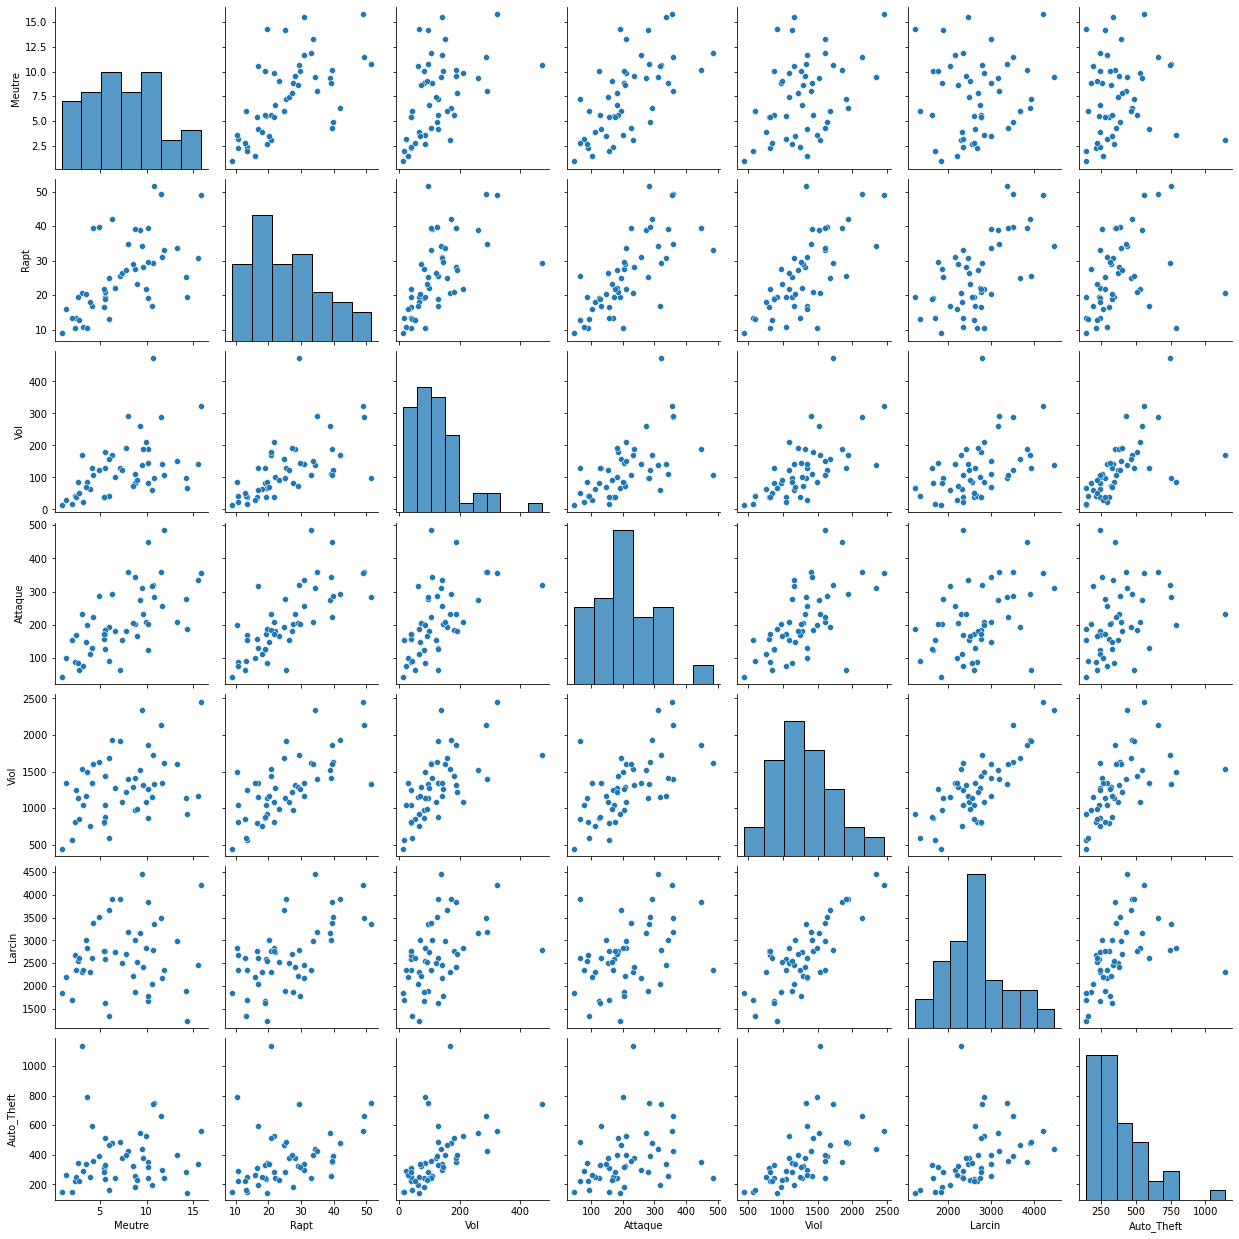

In [5]:
sns.pairplot(data)

<AxesSubplot:>

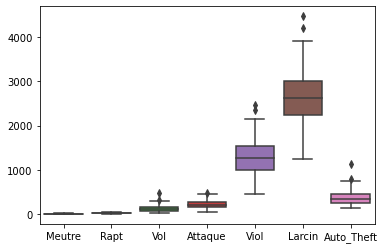

In [6]:
sns.boxplot(data=data)


In [7]:
data.corr(method="pearson")

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
Meutre,1.000000,0.601220,0.483708,0.648550,0.385817,0.101920,0.068814
Rapt,0.601220,1.000000,0.591879,0.740260,0.712130,0.613988,0.348902
Vol,0.483708,0.591879,1.000000,0.557078,0.637242,0.446740,0.590680
Attaque,0.648550,0.740260,0.557078,1.000000,0.622909,0.404363,0.275843
Viol,0.385817,0.712130,0.637242,0.622909,1.000000,0.792121,0.557953
Larcin,0.101920,0.613988,0.446740,0.404363,0.792121,1.000000,0.444180
Auto_Theft,0.068814,0.348902,0.590680,0.275843,0.557953,0.444180,1.000000


<AxesSubplot:>

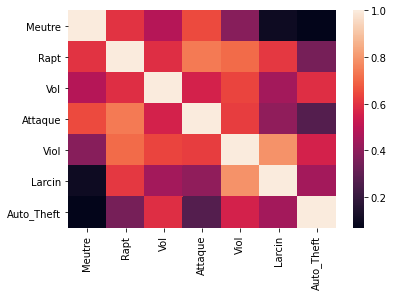

In [8]:
sns.heatmap(data.corr(method='pearson'))

In [9]:
label=data.iloc[:,0]
X=data.iloc[:,1:]

In [10]:
label.head()

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: Etat , dtype: object

In [11]:
X.head()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [12]:
scaled_X=preprocessing.scale(X)

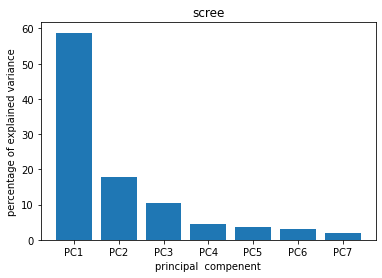

In [13]:
pca=PCA()
pca.fit(scaled_X)
pca_X=pca.transform(scaled_X)
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=["PC"+str(i) for i in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel("percentage of explained variance")
plt.xlabel("principal  compenent")
plt.title("scree")
plt.show()

In [14]:
per_var

array([58.8, 17.7, 10.4,  4.5,  3.7,  3.2,  1.8])

In [15]:
sum([per_var[i] for i in (0,1)])

76.5

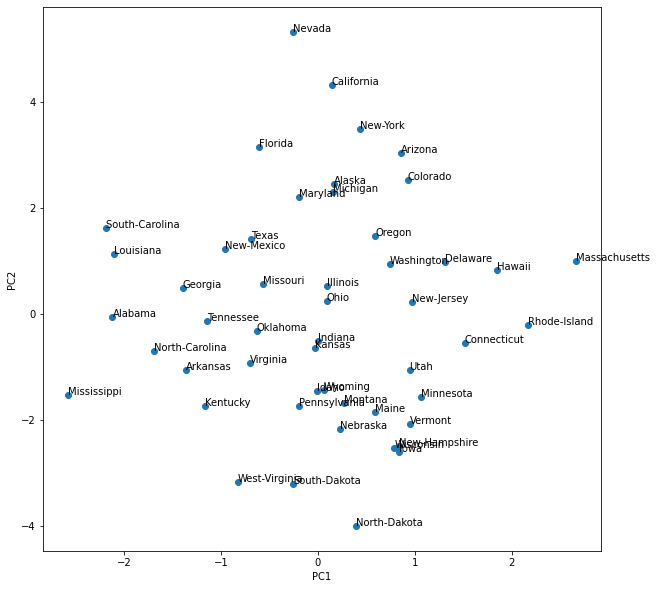

In [16]:
pca_df=pd.DataFrame(pca_X,columns=labels)
plt.figure(figsize=(10,10))
plt.scatter(pca_df.PC2,pca_df.PC1)
plt.xlabel("PC1")
plt.ylabel("PC2")
for i in range(label.shape[0]):
    plt.annotate(label[i],(pca_df.PC2[i],pca_df.PC1[i]))


In [17]:
wcc=[]
for i in range(1,11):
    kmeans = KMeans(init="k-means++",n_clusters=i,max_iter=300,random_state=0)
    kmeans.fit(scaled_X)
    wcc.append(kmeans.inertia_)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


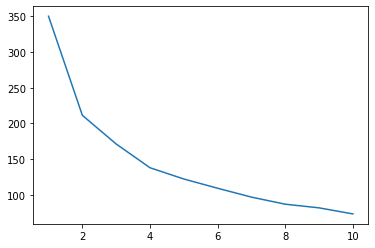

In [18]:
plt.plot(range(1,11),wcc)

In [19]:
kmeans = KMeans(init="k-means++",n_clusters=4,max_iter=300,random_state=0)
kmeans.fit(scaled_X)
y_kmeans=kmeans.labels_

In [20]:
y_kmeans

array([2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 1, 2, 3, 2, 3, 2, 3, 0, 1, 0,
       3, 2, 2, 3, 3, 0, 3, 1, 2, 0, 2, 3, 1, 2, 0, 3, 1, 2, 3, 2, 2, 3,
       3, 2, 1, 3, 3, 3])

In [21]:
color=['r','g','b','y']

In [22]:
pca_df['y_kmeans']=y_kmeans

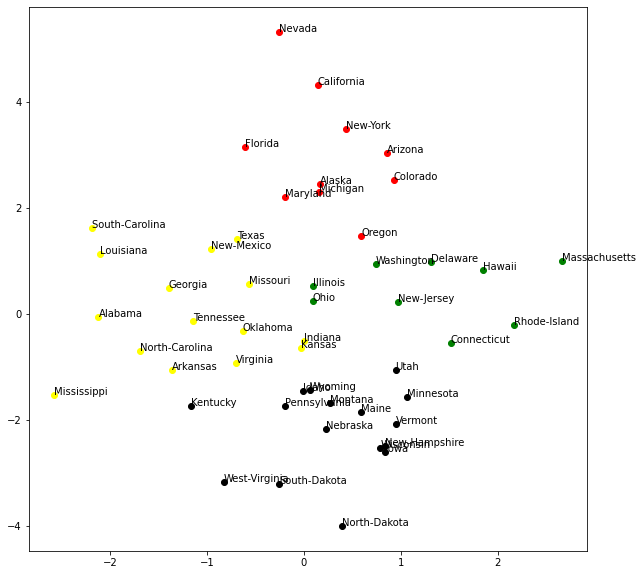

In [23]:
#filter rows of original data
filtered_label0 = pca_df[y_kmeans == 0]
filtered_label1=pca_df[y_kmeans==1]
filtered_label2= pca_df[y_kmeans== 2]
filtered_label3 = pca_df[y_kmeans==3]

 
#Plotting the results
plt.figure(figsize=(10,10))
plt.scatter(filtered_label0.PC2 , filtered_label0.PC1 , color = 'red')
plt.scatter(filtered_label1.PC2, filtered_label1.PC1 , color = 'green')
plt.scatter(filtered_label2.PC2 , filtered_label2.PC1, color = 'yellow')
plt.scatter(filtered_label3.PC2 , filtered_label3.PC1, color = 'black')
for i in range(label.shape[0]):
    plt.annotate(label[i],(pca_df.PC2[i],pca_df.PC1[i]))
plt.show()

In [28]:
kmeans1 = KMeans(init="k-means++",n_clusters=4,max_iter=300,random_state=0)
kmeans1.fit(X)
y_kmeans1=kmeans1.labels_

In [29]:
y_kmeans1

array([0, 3, 2, 0, 2, 2, 3, 2, 2, 1, 2, 1, 3, 1, 1, 1, 0, 1, 1, 3, 3, 3,
       1, 0, 1, 1, 1, 2, 1, 3, 3, 3, 1, 0, 1, 1, 2, 0, 3, 1, 0, 0, 3, 3,
       1, 1, 3, 0, 1, 1])

In [30]:
X['y_kmeans1']=y_kmeans1

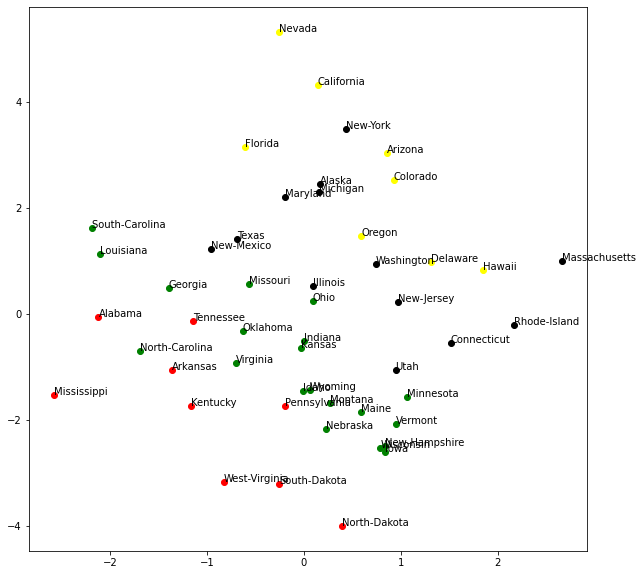

In [31]:
#filter rows of original data
filtered1_label0 = pca_df[y_kmeans1 == 0]
filtered1_label1=pca_df[y_kmeans1==1]
filtered1_label2= pca_df[y_kmeans1== 2]
filtered1_label3 = pca_df[y_kmeans1==3]

 
#Plotting the results
plt.figure(figsize=(10,10))
plt.scatter(filtered1_label0.PC2 , filtered1_label0.PC1 , color = 'red')
plt.scatter(filtered1_label1.PC2, filtered1_label1.PC1 , color = 'green')
plt.scatter(filtered1_label2.PC2 , filtered1_label2.PC1, color = 'yellow')
plt.scatter(filtered1_label3.PC2 , filtered1_label3.PC1, color = 'black')
for i in range(label.shape[0]):
    plt.annotate(label[i],(pca_df.PC2[i],pca_df.PC1[i]))
plt.show()

In [33]:
finalpca=pca_df[['PC1','PC2']]

<ipython-input-34-abcdcf2a4d0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalpca['y_kmeans2']=y_kmeans2


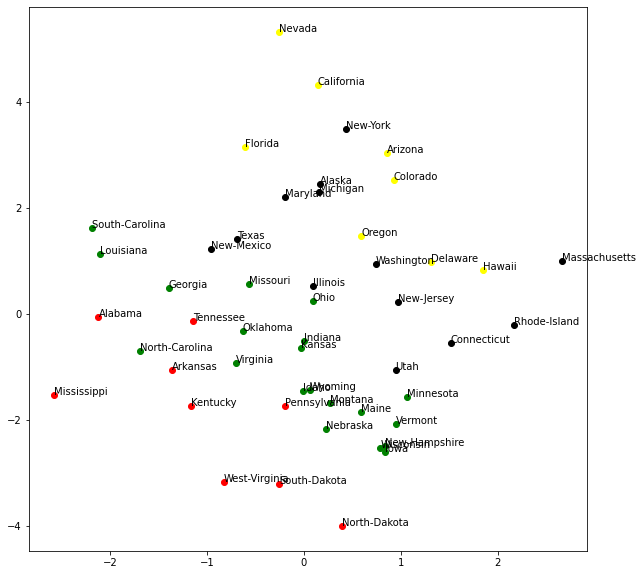

In [34]:
kmeans2 = KMeans(init="k-means++",n_clusters=4,max_iter=300,random_state=0)
kmeans2.fit(finalpca)
y_kmeans2=kmeans1.labels_
finalpca['y_kmeans2']=y_kmeans2
#filter rows of original data
filtered2_label0 = pca_df[y_kmeans2 == 0]
filtered2_label1=pca_df[y_kmeans2==1]
filtered2_label2= pca_df[y_kmeans2== 2]
filtered2_label3 = pca_df[y_kmeans2==3]

 
#Plotting the results
plt.figure(figsize=(10,10))
plt.scatter(filtered2_label0.PC2 , filtered2_label0.PC1 , color = 'red')
plt.scatter(filtered2_label1.PC2, filtered2_label1.PC1 , color = 'green')
plt.scatter(filtered2_label2.PC2 , filtered2_label2.PC1, color = 'yellow')
plt.scatter(filtered2_label3.PC2 , filtered2_label3.PC1, color = 'black')
for i in range(label.shape[0]):
    plt.annotate(label[i],(pca_df.PC2[i],pca_df.PC1[i]))
plt.show()

In [35]:
y_kmeans1==y_kmeans2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [37]:
y_kmeans==y_kmeans1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False])

In [36]:
y_kmeans==y_kmeans2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False])